In [98]:
from sklearn import cross_validation 
from sklearn import neighbors
from sklearn import metrics

import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [99]:
column_names = ['Type','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data = pd.read_csv("wine.data",names = column_names, header = None)

In [100]:
data.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [101]:
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle
data = shuffle(data)
X = data.loc[:, data.columns != 'Type']
X = normalize(X)
y = np.array(data['Type'])

for i in range(len(y)):
    y[i]= y[i]-1
print y


[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2 0 1 2 2 1 2 2 0 1 2 1 1 2 1 0 1 1 1 0 0
 1 1 2 2 1 1 1 2 2 0 2 1 1 1 1 1 0 0 1 0 2 0 2 0 0 1 0 1 1 0 2 1 0 1 1 1 2
 0 2 2 0 0 1 2 0 0 1 1 0 0 0 2 1 0 1 2 0 1 2 2 0 0 2 0 2 1 0 0 1 0 2 1 2 0
 2 2 2 0 1 1 1 1 2 2 1 1 0 1 2 2 0 0 2 1 1 1 0 0 0 1 1 1 0 2]


In [102]:

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

# Настройка параметров сети.

In [103]:
from pybrain.datasets import ClassificationDataSet # Структура данных pybrain
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer
from pybrain.utilities import percentError

In [104]:
# Определение основных констант
HIDDEN_NEURONS_NUM = 100 # Количество нейронов, содержащееся в скрытом слое сети
MAX_EPOCHS = 100 # Максимальное число итераций алгоритма оптимизации параметров сети

In [105]:
# Конвертация данных в структуру ClassificationDataSet
# Обучающая часть
ds_train = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
# Первый аргумент -- количество признаков np.shape(X)[1], второй аргумент -- количество меток классов len(np.unique(y_train)))
ds_train.setField('input', X_train) # Инициализация объектов
ds_train.setField('target', y_train[:, np.newaxis]) # Инициализация ответов; np.newaxis создает вектор-столбец
ds_train._convertToOneOfMany( ) # Бинаризация вектора ответов
# Контрольная часть
ds_test = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
ds_test.setField('input', X_test)
ds_test.setField('target', y_test[:, np.newaxis])
ds_test._convertToOneOfMany( )

In [106]:
np.random.seed(0) # Зафиксируем seed для получения воспроизводимого результата

# Построение сети прямого распространения (Feedforward network)
net = buildNetwork(ds_train.indim, HIDDEN_NEURONS_NUM, ds_train.outdim, outclass=SoftmaxLayer)

init_params = np.random.random((len(net.params))) # Инициализируем веса сети для получения воспроизводимого результата
net._setParameters(init_params)

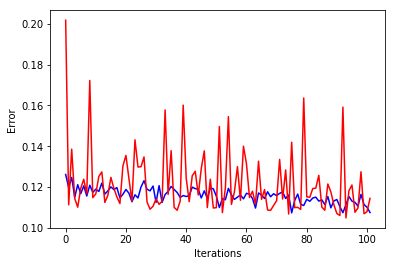

In [107]:
random.seed(0)
# Модуль настройки параметров pybrain использует модуль random; зафиксируем seed для получения воспроизводимого результата
trainer = BackpropTrainer(net, dataset=ds_train) # Инициализируем модуль оптимизации
err_train, err_val = trainer.trainUntilConvergence(maxEpochs=MAX_EPOCHS)
line_train = plt.plot(err_train, 'b', err_val, 'r') # Построение графика
xlab = plt.xlabel('Iterations')
ylab = plt.ylabel('Error')

In [108]:
res_train = net.activateOnDataset(ds_train).argmax(axis=1) # Подсчет результата на обучающей выборке
print 'Error on train: ', percentError(res_train, ds_train['target'].argmax(axis=1)), '%' # Подсчет ошибки
res_test = net.activateOnDataset(ds_test).argmax(axis=1) # Подсчет результата на тестовой выборке
print 'Error on test: ', percentError(res_test, ds_test['target'].argmax(axis=1)), '%' # Подсчет ошибки

Error on train:  63.1578947368 %
Error on test:  55.5555555556 %


# Определение оптимального числа нейронов.


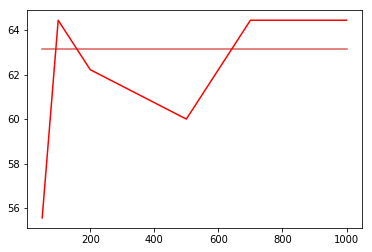

In [109]:
random.seed(0) # Зафиксируем seed для получния воспроизводимого результата
np.random.seed(0)

def plot_classification_error(hidden_neurons_num, res_train_vec, res_test_vec):
# hidden_neurons_num -- массив размера h, содержащий количество нейронов, по которому предполагается провести перебор,
#   hidden_neurons_num = [50, 100, 200, 500, 700, 1000];
# res_train_vec -- массив размера h, содержащий значения доли неправильных ответов классификации на обучении;
# res_train_vec -- массив размера h, содержащий значения доли неправильных ответов классификации на контроле
    plt.figure()
    plt.plot(hidden_neurons_num, res_train_vec)
    plt.plot(hidden_neurons_num, res_test_vec, '-r')


hidden_neurons_num = [50, 100, 200, 500, 700, 1000]
res_train_vec = list()
res_test_vec = list()

for nnum in hidden_neurons_num:
    net = buildNetwork(ds_train.indim, nnum, ds_train.outdim, outclass=SoftmaxLayer)
    init_params = np.random.random((len(net.params)))
    net._setParameters(init_params)
    
    trainer = BackpropTrainer(net, dataset=ds_train) 
    err_train, err_val = trainer.trainUntilConvergence(maxEpochs=MAX_EPOCHS)

   
    res_train_ = net.activateOnDataset(ds_train).argmax(axis=1)
    error_on_train = percentError(res_train, ds_train['target'].argmax(axis=1))
    res_train_vec.append(error_on_train)
    res_test = net.activateOnDataset(ds_test).argmax(axis=1)
    error_on_test = percentError(res_test, ds_test['target'].argmax(axis=1))
    res_test_vec.append(error_on_test)
    
plot_classification_error(hidden_neurons_num, res_train_vec, res_test_vec)          

In [110]:
test_size = [0.20, 0.25, 0.27, 0.30, 0.35, 0.40]
train_error = []
test_error = []

for t in test_size:
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=t)
    HIDDEN_NEURONS_NUM = 200 # Количество нейронов, содержащееся в скрытом слое сети
    MAX_EPOCHS = 100 
    # Конвертация данных в структуру ClassificationDataSet
    # Обучающая часть
    ds_train = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
    # Первый аргумент -- количество признаков np.shape(X)[1], второй аргумент -- количество меток классов len(np.unique(y_train)))
    ds_train.setField('input', X_train) # Инициализация объектов
    ds_train.setField('target', y_train[:, np.newaxis]) # Инициализация ответов; np.newaxis создает вектор-столбец
    ds_train._convertToOneOfMany( ) # Бинаризация вектора ответов
    # Контрольная часть
    ds_test = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
    ds_test.setField('input', X_test)
    ds_test.setField('target', y_test[:, np.newaxis])
    ds_test._convertToOneOfMany( )
    np.random.seed(0) # Зафиксируем seed для получения воспроизводимого результата

    # Построение сети прямого распространения (Feedforward network)
    net = buildNetwork(ds_train.indim, HIDDEN_NEURONS_NUM, ds_train.outdim, outclass=SoftmaxLayer)

    init_params = np.random.random((len(net.params))) # Инициализируем веса сети для получения воспроизводимого результата
    net._setParameters(init_params)
    
 
    res_train = net.activateOnDataset(ds_train).argmax(axis=1) # Подсчет результата на обучающей выборке
    train_error.append(percentError(res_train, ds_train['target'].argmax(axis=1)))
    res_test = net.activateOnDataset(ds_test).argmax(axis=1) # Подсчет результата на тестовой выборке
    test_error.append(percentError(res_test, ds_test['target'].argmax(axis=1)))

In [111]:
print train_error

[71.12676056338029, 72.93233082706767, 74.4186046511628, 74.19354838709677, 73.91304347826087, 73.58490566037736]


In [112]:
print test_error

[80.55555555555556, 73.33333333333333, 69.38775510204081, 70.37037037037037, 71.42857142857143, 72.22222222222223]


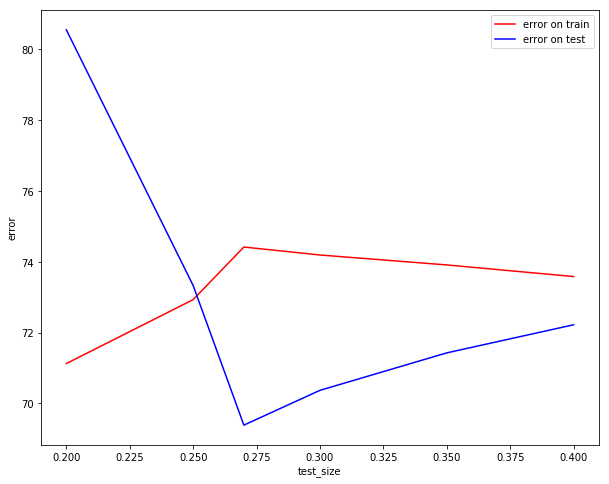

In [113]:
x = np.linspace(1, 19, 19)
plt.figure(figsize=(10, 8))
plt.plot(test_size, train_error, color='r', label='error on train')
plt.plot(test_size, test_error, color='b', label='error on test')
plt.xlabel('test_size')
plt.ylabel('error')
plt.legend()
plt.show()

Странные графики( судя по всему лучший размер тестовой выборки 0.25.

# Строим график зависимости ошибки от номера итерации алгоритма 

Попробуем теперь запустить модель с числом нейронов в скрытом слое сети 200 и размером тестовой выборки 0.25(исходя из полученных ранее данных)

In [114]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)
ds_train = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
# Первый аргумент -- количество признаков np.shape(X)[1], второй аргумент -- количество меток классов len(np.unique(y_train)))
ds_train.setField('input', X_train) # Инициализация объектов
ds_train.setField('target', y_train[:, np.newaxis]) # Инициализация ответов; np.newaxis создает вектор-столбец
ds_train._convertToOneOfMany( ) # Бинаризация вектора ответов
# Контрольная часть
ds_test = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
ds_test.setField('input', X_test)
ds_test.setField('target', y_test[:, np.newaxis])
ds_test._convertToOneOfMany( )
np.random.seed(0) # Зафиксируем seed для получения воспроизводимого результата

# Построение сети прямого распространения (Feedforward network)
net = buildNetwork(ds_train.indim, 200, ds_train.outdim, outclass=SoftmaxLayer)

init_params = np.random.random((len(net.params))) # Инициализируем веса сети для получения воспроизводимого результата
net._setParameters(init_params)


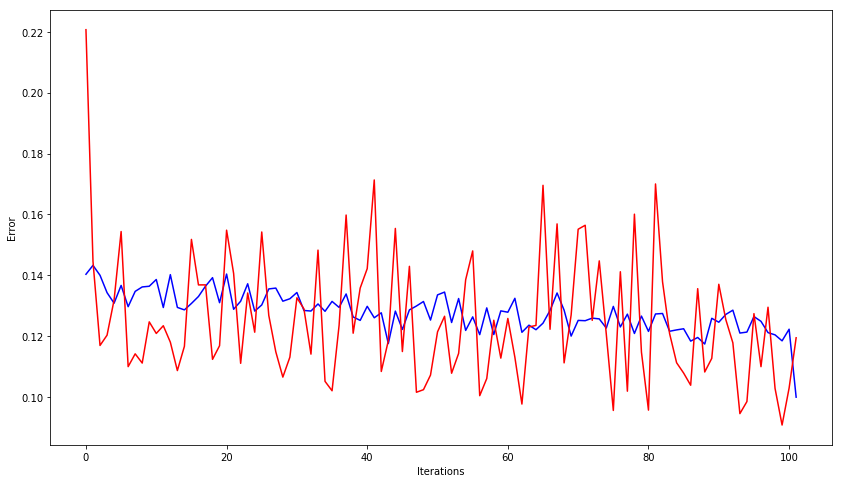

In [115]:
plt.figure(figsize=(14,8))
random.seed(0)
# Модуль настройки параметров pybrain использует модуль random; зафиксируем seed для получения воспроизводимого результата
trainer = BackpropTrainer(net, dataset=ds_train) # Инициализируем модуль оптимизации
err_train, err_val = trainer.trainUntilConvergence(maxEpochs=100)
line_train = plt.plot(err_train, 'b', err_val, 'r') # Построение графика
xlab = plt.xlabel('Iterations')
ylab = plt.ylabel('Error')

In [116]:
res_train = net.activateOnDataset(ds_train).argmax(axis=1) # Подсчет результата на обучающей выборке
print 'Error on train: ', percentError(res_train, ds_train['target'].argmax(axis=1)), '%' # Подсчет ошибки
res_test = net.activateOnDataset(ds_test).argmax(axis=1) # Подсчет результата на тестовой выборке
print 'Error on test: ', percentError(res_test, ds_test['target'].argmax(axis=1)), '%' # Подсчет ошибки

Error on train:  36.8421052632 %
Error on test:  42.2222222222 %


ну вот это уже чуть лучше,но боюсь представить, что будет, если добавить шум.

# Добавляем шум.

In [117]:
scales = [ 0.8, 1.2, 1.5]


In [118]:
import seaborn as sns

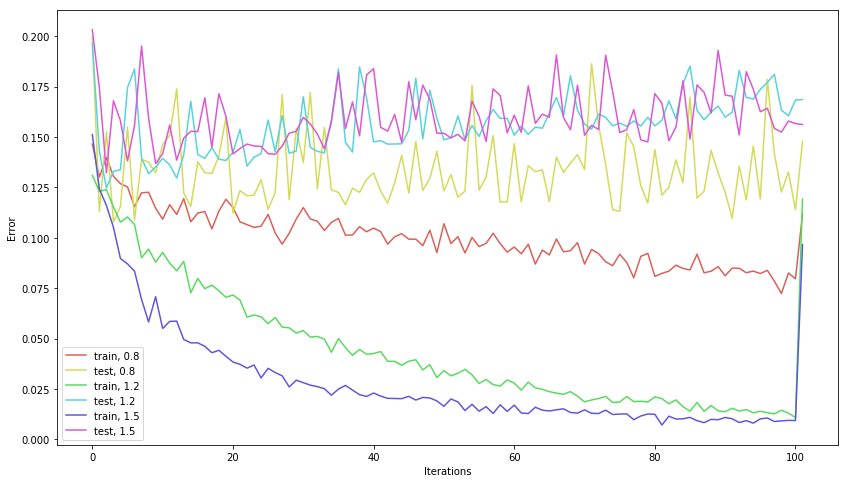

In [119]:
plt.figure(figsize=(14,8))
for scale in scales:
    noise = np.random.normal(scale=scale, size=X.shape)
    X = X+noise
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)
    ds_train = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
    # Первый аргумент -- количество признаков np.shape(X)[1], второй аргумент -- количество меток классов len(np.unique(y_train)))
    ds_train.setField('input', X_train) # Инициализация объектов
    ds_train.setField('target', y_train[:, np.newaxis]) # Инициализация ответов; np.newaxis создает вектор-столбец
    ds_train._convertToOneOfMany( ) # Бинаризация вектора ответов
    # Контрольная часть
    ds_test = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
    ds_test.setField('input', X_test)
    ds_test.setField('target', y_test[:, np.newaxis])
    ds_test._convertToOneOfMany( )
    np.random.seed(0) # Зафиксируем seed для получения воспроизводимого результата

    # Построение сети прямого распространения (Feedforward network)
    net = buildNetwork(ds_train.indim, 200, ds_train.outdim, outclass=SoftmaxLayer)

    init_params = np.random.random((len(net.params))) # Инициализируем веса сети для получения воспроизводимого результата
    net._setParameters(init_params)

    sns.set_palette(sns.color_palette('hls', len(scales)*2))
    
    random.seed(0)
    # Модуль настройки параметров pybrain использует модуль random; зафиксируем seed для получения воспроизводимого результата
    trainer = BackpropTrainer(net, dataset=ds_train) # Инициализируем модуль оптимизации
    err_train, err_val = trainer.trainUntilConvergence(maxEpochs=100)
    plt.plot(err_train, label='train, %s' % scale)
    plt.plot(err_val, label='test, %s' % scale) # Построение графика
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.legend()